<a href="https://colab.research.google.com/github/trisha-shiny/Handwritten-digit-recognition/blob/main/2_Handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow matplotlib

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype("float32") / 255.0

In [6]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1, verbose=2)

Epoch 1/5
422/422 - 39s - 93ms/step - accuracy: 0.9009 - loss: 0.3219 - val_accuracy: 0.9840 - val_loss: 0.0568
Epoch 2/5
422/422 - 40s - 96ms/step - accuracy: 0.9698 - loss: 0.1025 - val_accuracy: 0.9865 - val_loss: 0.0431
Epoch 3/5
422/422 - 41s - 97ms/step - accuracy: 0.9773 - loss: 0.0748 - val_accuracy: 0.9890 - val_loss: 0.0395
Epoch 4/5
422/422 - 40s - 94ms/step - accuracy: 0.9817 - loss: 0.0592 - val_accuracy: 0.9907 - val_loss: 0.0388
Epoch 5/5
422/422 - 42s - 99ms/step - accuracy: 0.9850 - loss: 0.0494 - val_accuracy: 0.9890 - val_loss: 0.0364


In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f" Test Accuracy: {test_acc * 100:.2f}%")

313/313 - 2s - 7ms/step - accuracy: 0.9907 - loss: 0.0273
 Test Accuracy: 99.07%


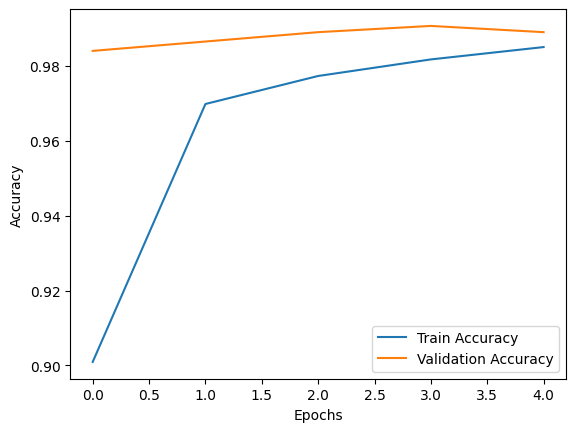

In [11]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

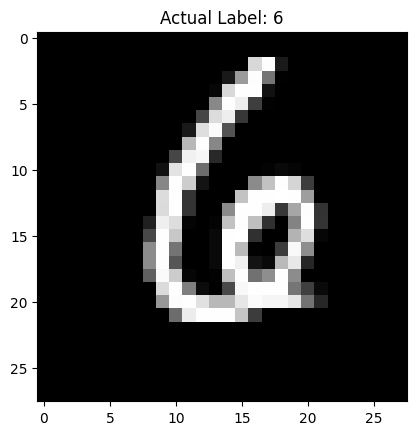

In [12]:
import numpy as np
index = 123
plt.imshow(x_test[index].reshape(28,28), cmap='gray')
plt.title("Actual Label: " + str(np.argmax(y_test[index])))
plt.show()

In [13]:
pred = model.predict(x_test[index].reshape(1,28,28,1))
print("Predicted Label:", np.argmax(pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Predicted Label: 6
